In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statistics as statistics

In [93]:
df = pd.read_csv("csv_result-synthetic_control.csv")
df

,nan,nan.1,0,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,label
0,1,1,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,...,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717,Normal
1,2,2,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,...,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910,Normal
2,3,3,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,...,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430,Normal
3,4,4,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,...,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069,Normal
4,5,5,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,...,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,596,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,...,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289,Downward_shift
596,597,597,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,...,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201,Downward_shift
597,598,598,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,...,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747,Downward_shift
598,599,599,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,...,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599,Downward_shift


In [94]:

ccdf = df.drop(['nan','nan.1'], axis=1)

In [95]:
ccdf

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717,Normal
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910,Normal
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430,Normal
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069,Normal
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289,Downward_shift
596,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,27.5580,30.6863,...,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201,Downward_shift
597,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747,Downward_shift
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,35.8586,25.3866,...,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599,Downward_shift


In [96]:
shuffled = ccdf.sample(frac = 1)

In [97]:
shuffled


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
237,35.9394,26.7841,26.7745,35.1025,36.9021,34.5345,32.8467,37.0652,34.1574,37.8901,...,48.7387,50.7425,55.6025,52.7083,59.6582,50.0927,60.5389,58.96380,59.14540,Increasing_trend
42,31.5544,27.4875,31.6382,33.7431,30.5938,28.4246,34.0302,24.8949,32.3752,30.2677,...,24.4014,32.7189,26.3249,31.1656,25.9136,24.8766,27.2675,25.13950,25.78580,Normal
23,32.2613,27.3329,30.6940,27.3329,33.7185,30.3973,32.7784,30.8898,31.1498,33.5620,...,34.0824,35.8403,35.4191,24.8211,29.9614,34.5410,26.3667,24.01320,27.93440,Normal
222,27.4680,29.3275,34.4570,37.3704,26.9016,36.2244,35.8864,33.6723,39.5308,31.5348,...,53.3908,51.3581,55.3250,53.6860,52.2059,50.7064,52.0522,60.11980,51.71950,Increasing_trend
135,29.5406,33.5848,35.8956,38.0802,42.6702,33.6437,31.6486,20.7756,24.8114,13.2187,...,42.4861,37.1547,34.9041,33.2341,31.3235,18.1452,17.7995,19.20960,18.73370,Cyclic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,32.0700,35.9270,46.0664,47.0233,38.0722,37.3594,26.1317,13.0016,11.8143,13.1851,...,18.6147,27.6506,28.8793,40.8209,46.9311,38.1265,38.3925,29.38150,18.31660,Cyclic
524,25.6319,35.9824,25.3374,33.0380,25.8299,31.8243,30.7579,31.0036,34.1176,34.2737,...,12.8505,11.9824,16.9031,9.2172,11.0882,14.7640,12.3386,10.74920,9.34499,Downward_shift
230,27.0362,31.8087,33.7103,31.5795,31.8397,28.5000,29.6826,34.8400,27.4564,35.8762,...,52.0086,46.0154,53.8575,50.6243,46.6934,46.7181,52.2497,52.61820,48.52830,Increasing_trend
302,25.5915,29.9510,34.1883,25.6580,26.8874,23.5727,34.0696,32.1339,24.2264,32.8350,...,17.2087,15.5848,17.0231,19.0416,18.0558,17.9580,15.1527,9.62487,17.56220,Decreasing_trend


In [98]:
shlabeldf = shuffled['label']
shlabeldf

237    Increasing_trend
42               Normal
23               Normal
222    Increasing_trend
135              Cyclic
             ...       
140              Cyclic
524      Downward_shift
230    Increasing_trend
302    Decreasing_trend
569      Downward_shift
Name: label, Length: 600, dtype: object

In [99]:
shvluesdf  = shuffled.drop('label',axis = 1)

In [100]:
shvluesdf

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
237,35.9394,26.7841,26.7745,35.1025,36.9021,34.5345,32.8467,37.0652,34.1574,37.8901,...,48.3275,48.7387,50.7425,55.6025,52.7083,59.6582,50.0927,60.5389,58.96380,59.14540
42,31.5544,27.4875,31.6382,33.7431,30.5938,28.4246,34.0302,24.8949,32.3752,30.2677,...,30.0984,24.4014,32.7189,26.3249,31.1656,25.9136,24.8766,27.2675,25.13950,25.78580
23,32.2613,27.3329,30.6940,27.3329,33.7185,30.3973,32.7784,30.8898,31.1498,33.5620,...,33.3020,34.0824,35.8403,35.4191,24.8211,29.9614,34.5410,26.3667,24.01320,27.93440
222,27.4680,29.3275,34.4570,37.3704,26.9016,36.2244,35.8864,33.6723,39.5308,31.5348,...,57.9716,53.3908,51.3581,55.3250,53.6860,52.2059,50.7064,52.0522,60.11980,51.71950
135,29.5406,33.5848,35.8956,38.0802,42.6702,33.6437,31.6486,20.7756,24.8114,13.2187,...,34.1597,42.4861,37.1547,34.9041,33.2341,31.3235,18.1452,17.7995,19.20960,18.73370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,32.0700,35.9270,46.0664,47.0233,38.0722,37.3594,26.1317,13.0016,11.8143,13.1851,...,10.0067,18.6147,27.6506,28.8793,40.8209,46.9311,38.1265,38.3925,29.38150,18.31660
524,25.6319,35.9824,25.3374,33.0380,25.8299,31.8243,30.7579,31.0036,34.1176,34.2737,...,13.5607,12.8505,11.9824,16.9031,9.2172,11.0882,14.7640,12.3386,10.74920,9.34499
230,27.0362,31.8087,33.7103,31.5795,31.8397,28.5000,29.6826,34.8400,27.4564,35.8762,...,49.6671,52.0086,46.0154,53.8575,50.6243,46.6934,46.7181,52.2497,52.61820,48.52830
302,25.5915,29.9510,34.1883,25.6580,26.8874,23.5727,34.0696,32.1339,24.2264,32.8350,...,10.7862,17.2087,15.5848,17.0231,19.0416,18.0558,17.9580,15.1527,9.62487,17.56220


In [101]:
shtranspose = shvluesdf.transpose()

In [102]:
for column in shtranspose.columns:
    shtranspose[column] = shtranspose[column] /shtranspose[column].abs().max()
  
# view normalized data
display(shtranspose)


,237,42,23,222,135,432,491,425,486,136,...,37,393,350,321,210,140,524,230,302,569
0,0.593658,0.879904,0.900140,0.456888,0.692300,0.492910,0.489294,0.622922,0.540648,0.573585,...,0.974565,1.000000,0.918021,1.000000,0.616836,0.642957,0.712345,0.501995,0.748546,0.751922
1,0.442428,0.766497,0.762630,0.487818,0.787079,0.506543,0.647011,0.497628,0.539706,0.816480,...,0.777994,0.680154,0.713437,0.804505,0.584295,0.720285,1.000000,0.590609,0.876060,0.983776
2,0.442269,0.882240,0.856410,0.573139,0.841233,0.505330,0.632971,0.517607,0.514494,0.811519,...,0.798975,0.771610,1.000000,0.776096,0.739942,0.923565,0.704161,0.625917,1.000000,0.940887
3,0.579834,0.940936,0.762630,0.621599,0.892431,0.515976,0.642150,0.610008,0.562507,0.983802,...,0.809723,0.817813,0.746947,0.975578,0.538113,0.942749,0.918171,0.586353,0.750491,0.824469
4,0.609560,0.853117,0.940798,0.447467,1.000000,0.682976,0.596917,0.576035,0.488077,0.923629,...,0.926297,0.973171,0.804918,0.999964,0.728540,0.763293,0.717848,0.591184,0.786450,1.000000
5,0.570451,0.792628,0.848132,0.602537,0.788459,0.480459,0.541743,0.539540,0.658488,0.745447,...,0.864919,0.788749,0.785455,0.973211,0.732757,0.749002,0.884441,0.529174,0.689496,0.845021
6,0.542572,0.948942,0.914568,0.596915,0.741703,0.497567,0.706262,0.474841,0.651024,0.674900,...,0.830347,0.918482,0.923721,0.767031,0.737751,0.523903,0.854804,0.551132,0.996528,0.812976
7,0.612254,0.694202,0.861873,0.560087,0.486888,0.704276,0.630994,0.483038,0.565507,0.452679,...,0.824963,0.712629,0.752653,0.818435,0.570401,0.260663,0.861632,0.646892,0.939909,0.715819
8,0.564222,0.902792,0.869128,0.657534,0.581469,0.619880,0.611194,0.449466,0.535539,0.485038,...,0.948795,0.823626,0.844900,0.847739,0.581402,0.236860,0.948175,0.509797,0.708617,0.717855
9,0.625880,0.844024,0.936432,0.524533,0.309788,0.480759,0.634869,0.446627,0.644780,0.560817,...,0.745407,0.698837,0.894562,0.930105,0.675207,0.264342,0.952513,0.666132,0.960416,0.973199


In [103]:
shvalues = shtranspose.transpose()

In [104]:
shvalues

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
237,0.593658,0.442428,0.442269,0.579834,0.609560,0.570451,0.542572,0.612254,0.564222,0.625880,...,0.798288,0.805081,0.838180,0.918459,0.870652,0.985452,0.827446,1.000000,0.973982,0.976982
42,0.879904,0.766497,0.882240,0.940936,0.853117,0.792628,0.948942,0.694202,0.902792,0.844024,...,0.839303,0.680440,0.912376,0.734077,0.869062,0.722608,0.693691,0.760362,0.701022,0.719045
23,0.900140,0.762630,0.856410,0.762630,0.940798,0.848132,0.914568,0.861873,0.869128,0.936432,...,0.929177,0.950952,1.000000,0.988248,0.692547,0.835970,0.963748,0.735672,0.670006,0.779413
222,0.456888,0.487818,0.573139,0.621599,0.447467,0.602537,0.596915,0.560087,0.657534,0.524533,...,0.964268,0.888073,0.854263,0.920246,0.892984,0.868364,0.843423,0.865808,1.000000,0.860274
135,0.692300,0.787079,0.841233,0.892431,1.000000,0.788459,0.741703,0.486888,0.581469,0.309788,...,0.800552,0.995686,0.870741,0.817997,0.778860,0.734084,0.425243,0.417141,0.450188,0.439035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.642957,0.720285,0.923565,0.942749,0.763293,0.749002,0.523903,0.260663,0.236860,0.264342,...,0.200620,0.373198,0.554355,0.578988,0.818400,0.940901,0.764381,0.769714,0.589057,0.367221
524,0.712345,1.000000,0.704161,0.918171,0.717848,0.884441,0.854804,0.861632,0.948175,0.952513,...,0.376870,0.357133,0.333007,0.469760,0.256159,0.308156,0.410312,0.342907,0.298735,0.259710
230,0.501995,0.590609,0.625917,0.586353,0.591184,0.529174,0.551132,0.646892,0.509797,0.666132,...,0.922195,0.965671,0.854392,1.000000,0.939968,0.866980,0.867439,0.970147,0.976989,0.901050
302,0.748546,0.876060,1.000000,0.750491,0.786450,0.689496,0.996528,0.939909,0.708617,0.960416,...,0.315494,0.503351,0.455852,0.497922,0.556962,0.528128,0.525267,0.443213,0.281525,0.513690


In [105]:
labeldf = ccdf['label']

In [106]:
labeldf

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
            ...      
595    Downward_shift
596    Downward_shift
597    Downward_shift
598    Downward_shift
599    Downward_shift
Name: label, Length: 600, dtype: object

In [107]:
vluesdf  = ccdf.drop('label',axis = 1)

In [108]:


vluesdf

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,31.4333,24.5556,33.74310,25.0466,34.93180,34.98790,32.4721,33.3759,25.46520,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,...,32.5577,31.0205,26.64180,28.4331,33.65640,26.42440,28.4661,34.2484,32.10050,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,33.6318,26.5966,25.53870,32.5434,25.57720,29.98970,31.3510,33.9002,29.54460,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,...,34.6292,28.7261,28.29790,31.5787,34.61560,32.54920,30.9827,24.8938,27.36590,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,...,27.7218,27.9601,35.71980,27.5760,35.33750,29.99930,34.2149,33.1276,31.10570,31.0179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,26.7468,18.8795,21.33210,23.6915,22.30970,19.13610,15.2851,22.5278,20.65720,24.1289
596,27.4144,25.3973,26.4600,31.9782,26.1251,27.4629,30.4888,34.9292,27.5580,30.6863,...,19.1063,11.4546,16.88800,18.2691,11.58310,14.11760,20.2289,11.1314,9.98019,10.7201
597,35.8990,26.6719,34.1911,35.8270,25.1009,24.8564,25.8141,30.6301,34.2124,32.5874,...,21.8787,16.0021,15.28790,16.9459,17.53380,16.84640,16.5460,15.9268,18.08430,17.4747
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,32.8100,30.4829,35.8586,25.3866,...,19.6441,11.5238,15.41850,12.6699,13.11640,8.23496,12.0419,19.3096,12.99850,17.4599


In [109]:
labeldf

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
            ...      
595    Downward_shift
596    Downward_shift
597    Downward_shift
598    Downward_shift
599    Downward_shift
Name: label, Length: 600, dtype: object

In [110]:
import tensorflow as tf
import sklearn

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the categorical data
le.fit(shlabeldf)

# Transform the categorical data into numerical data
encoded_data = le.transform(shlabeldf)

In [113]:
from tensorflow.keras.utils import to_categorical

In [114]:
y_data = to_categorical(encoded_data,6)

In [115]:
tf.__version__

'2.11.0'

In [116]:
y_data

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [117]:
X = shvalues.values
Y = y_data

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=101)

In [119]:
X_train

array([[0.76618576, 0.827608  , 0.77214538, ..., 0.73543845, 0.72605504,
        0.99203621],
       [0.7393271 , 0.66413295, 0.78890146, ..., 0.96744033, 0.88577643,
        0.76148244],
       [0.46911623, 0.50818666, 0.58352988, ..., 1.        , 0.92339269,
        0.90041782],
       ...,
       [0.88686813, 0.9352966 , 0.71495279, ..., 0.24703403, 0.2799032 ,
        0.23256159],
       [0.63692186, 0.80372655, 0.88925576, ..., 0.95860884, 0.82091648,
        0.75714469],
       [0.50563978, 0.72711212, 0.72541235, ..., 0.45371201, 0.57158388,
        0.768582  ]])

In [120]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [121]:
model = Sequential()


# input layer
model.add(Dense(60))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0))




# output layer
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
from tensorflow.keras.callbacks import EarlyStopping


In [123]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [124]:
model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/60


17/17 [==============================] - 2s 21ms/step - loss: 1.7638 - accuracy: 0.2389 - val_loss: 1.6866 - val_accuracy: 0.2500
Epoch 2/60
17/17 [==============================] - 0s 6ms/step - loss: 1.5765 - accuracy: 0.3241 - val_loss: 1.4988 - val_accuracy: 0.3833
Epoch 3/60
17/17 [==============================] - 0s 6ms/step - loss: 1.3939 - accuracy: 0.4204 - val_loss: 1.2328 - val_accuracy: 0.6000
Epoch 4/60
17/17 [==============================] - 0s 5ms/step - loss: 1.1940 - accuracy: 0.5111 - val_loss: 1.1231 - val_accuracy: 0.5000
Epoch 5/60
17/17 [==============================] - 0s 5ms/step - loss: 1.0615 - accuracy: 0.5926 - val_loss: 0.9611 - val_accuracy: 0.7167
Epoch 6/60
17/17 [==============================] - 0s 6ms/step - loss: 0.9426 - accuracy: 0.6352 - val_loss: 0.8975 - val_accuracy: 0.5833
Epoch 7/60
17/17 [==============================] - 0s 8ms/step - loss: 0.8537 - accuracy: 0.6796 - val_loss: 0.7718 - val_accuracy: 0.8333
Epoch 8/60
17/17 [============

In [125]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot: >

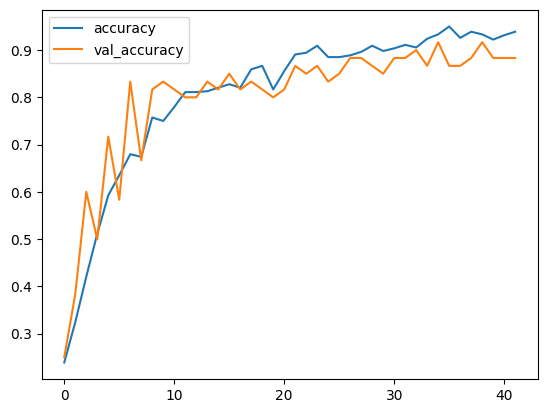

In [126]:
losses[['accuracy','val_accuracy']].plot()

In [127]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [85]:
predicted = []
for i in predictions:
    indicesxbar = np.where(i == i.max())
    indx = indicesxbar[0]

    if indx == [0]:
      patternx = "Cyclical"
    elif indx == [1]:
      patternx = "Decreasing Trend"
    elif indx == [2]:
      patternx = "Downward Shift"
    elif indx == [3]:
      patternx = "Increasing Trend"
    elif indx == [4]:
      patternx = "Normal-Random Pattern"
    elif indx == [5]:
      patternx = "Upward Shift"
    predicted.append(patternx)
predicted

['Normal-Random Pattern',
 'Upward Shift',
 'Increasing Trend',
 'Normal-Random Pattern',
 'Upward Shift',
 'Normal-Random Pattern',
 'Decreasing Trend',
 'Increasing Trend',
 'Increasing Trend',
 'Normal-Random Pattern',
 'Downward Shift',
 'Upward Shift',
 'Decreasing Trend',
 'Downward Shift',
 'Increasing Trend',
 'Increasing Trend',
 'Increasing Trend',
 'Downward Shift',
 'Normal-Random Pattern',
 'Downward Shift',
 'Decreasing Trend',
 'Downward Shift',
 'Increasing Trend',
 'Decreasing Trend',
 'Upward Shift',
 'Increasing Trend',
 'Decreasing Trend',
 'Cyclical',
 'Increasing Trend',
 'Cyclical',
 'Cyclical',
 'Increasing Trend',
 'Cyclical',
 'Upward Shift',
 'Downward Shift',
 'Upward Shift',
 'Normal-Random Pattern',
 'Decreasing Trend',
 'Upward Shift',
 'Downward Shift',
 'Normal-Random Pattern',
 'Upward Shift',
 'Normal-Random Pattern',
 'Downward Shift',
 'Cyclical',
 'Decreasing Trend',
 'Upward Shift',
 'Normal-Random Pattern',
 'Upward Shift',
 'Increasing Trend',
 

In [86]:
test = []
for i in y_test:
    indicesxbar = np.where(i == i.max())
    indx = indicesxbar[0]

    if indx == [0]:
      patternx = "Cyclical"
    elif indx == [1]:
      patternx = "Decreasing Trend"
    elif indx == [2]:
      patternx = "Downward Shift"
    elif indx == [3]:
      patternx = "Increasing Trend"
    elif indx == [4]:
      patternx = "Normal-Random Pattern"
    elif indx == [5]:
      patternx = "Upward Shift"
    test.append(patternx)
test

['Normal-Random Pattern',
 'Upward Shift',
 'Increasing Trend',
 'Normal-Random Pattern',
 'Upward Shift',
 'Normal-Random Pattern',
 'Decreasing Trend',
 'Increasing Trend',
 'Increasing Trend',
 'Normal-Random Pattern',
 'Downward Shift',
 'Upward Shift',
 'Decreasing Trend',
 'Downward Shift',
 'Increasing Trend',
 'Increasing Trend',
 'Increasing Trend',
 'Downward Shift',
 'Normal-Random Pattern',
 'Downward Shift',
 'Decreasing Trend',
 'Downward Shift',
 'Increasing Trend',
 'Downward Shift',
 'Upward Shift',
 'Increasing Trend',
 'Decreasing Trend',
 'Cyclical',
 'Increasing Trend',
 'Cyclical',
 'Cyclical',
 'Increasing Trend',
 'Cyclical',
 'Upward Shift',
 'Downward Shift',
 'Upward Shift',
 'Normal-Random Pattern',
 'Decreasing Trend',
 'Upward Shift',
 'Downward Shift',
 'Normal-Random Pattern',
 'Upward Shift',
 'Normal-Random Pattern',
 'Downward Shift',
 'Cyclical',
 'Decreasing Trend',
 'Increasing Trend',
 'Normal-Random Pattern',
 'Upward Shift',
 'Increasing Trend',

In [37]:
model.save('control_charts.h5')

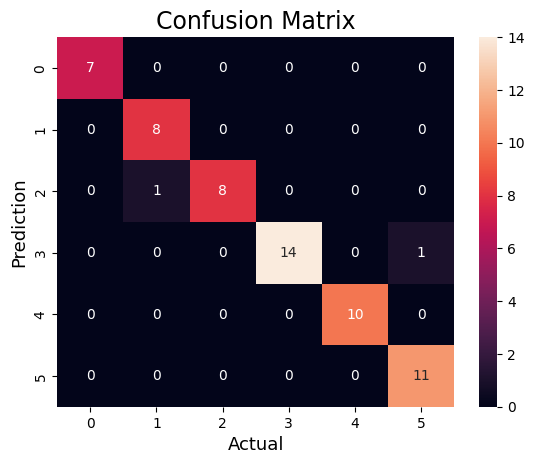

In [91]:
import seaborn as sns
cma = confusion_matrix(test,predicted)
sns.heatmap(cma,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()